In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#paramaters
#change all units to: force = pN, length = nm, time = ms
pars = {}
pars['a00'] = -21*10**-3
pars['a01'] = 1
pars['a10'] = -1.348
pars['a11'] = -1
pars['gamma0'] = 8.72
pars['gamma1'] = 54.8

pars['kbT'] = 4.1
pars['noise0'] = 2*pars['gamma0']*pars['kbT']
pars['noise1'] = 4.916*(1e3)

pars['delta_t'] = 0.01


In [3]:
(pars['a00']*pars['a11']) - (pars['a01']*pars['a10'])

1.369

In [4]:
def euler_one_traj(n_time, pars):   
    #initial condition
    x1 = 0
    x2 = 0
    x1_traj = []
    x2_traj = []
    
    #performing 1 traj with n_time number of data points
    for i in range(n_time):
        #generate delta_B
        s1 = np.random.normal(0, np.sqrt(pars['delta_t']) )
        s2 = np.random.normal(0, np.sqrt(pars['delta_t']) )
        #solve for x1, x2
        x1_new = x1 + (pars['a00']/pars['gamma0'])*x1*pars['delta_t'] + \
        (pars['a01']/pars['gamma0'])*x2*pars['delta_t'] + \
        np.sqrt((pars['noise0'])/((pars['gamma0'])**2))*s1
                 
        x2_new = x2 + (pars['a11']/pars['gamma1'])*x2*pars['delta_t'] + \
        (pars['a10']/pars['gamma1'])*x1*pars['delta_t'] + \
        np.sqrt((pars['noise1'])/((pars['gamma1'])**2))*s2
                
        x1 = x1_new
        x2 = x2_new
        
        x1_traj.append(x1)
        x2_traj.append(x2)
    return x1_traj, x2_traj

In [5]:
def euler_n_traj(max_time, pars):
    min_time = 0
    n_time = int((max_time - min_time)/pars['delta_t']+1) #n_time = num of evenly spaced samples (ex. 1001 points)
    time = np.linspace(min_time, max_time, n_time) #time(ex. 0 (min time), 0.01, 0.02, ..., 10 (max time)) with n_time no. of data points
    
    x_traj_list = []
    y_traj_list = []
    for i in tqdm(range(pars['n_realizations'])):
        x_traj, y_traj = euler_one_traj(n_time, pars)
        x_traj_list.append(x_traj)
        y_traj_list.append(y_traj)
        
    return x_traj_list, y_traj_list, time

In [6]:
def plotter_traj(x_traj_list, y_traj_list):
    fig, ax = plt.subplots(1, 3, figsize=(15,3))

    for x in x_traj_list:
        ax[0].plot(time, x)
    for y in y_traj_list:
        ax[1].plot(time, y)
    for x,y in zip(x_traj_list, y_traj_list):
        ax[2].plot(x,y)

    ax[0].set_xlabel('t')
    ax[0].set_ylabel('x')

    ax[1].set_xlabel('t')
    ax[1].set_ylabel('y')

    ax[2].set_xlabel('x')
    ax[2].set_ylabel('y')

    plt.tight_layout()
    plt.show()

In [7]:
#plot trajectories with t = 10s
pars['n_realizations'] = 100
length_plot = 500
x_traj_list, y_traj_list, time = euler_n_traj(length_plot, pars)

100%|██████████| 100/100 [01:02<00:00,  1.60it/s]


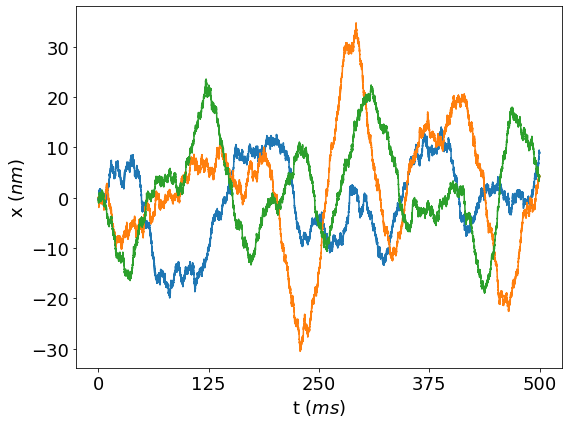

In [22]:
#Plot a sample trajectory
fig = plt.figure(figsize=(8,6))
plt.plot(time, x_traj_list[0])
plt.plot(time, x_traj_list[1])
plt.plot(time, x_traj_list[2])
plt.xlabel('t ($ms$)', fontsize=18)
plt.ylabel('x ($nm$)', fontsize=18)
plt.xticks(np.linspace(0, length_plot, 5), fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
# plt.savefig('sample_traj_paper_fin.png', dpi=100)
plt.show()

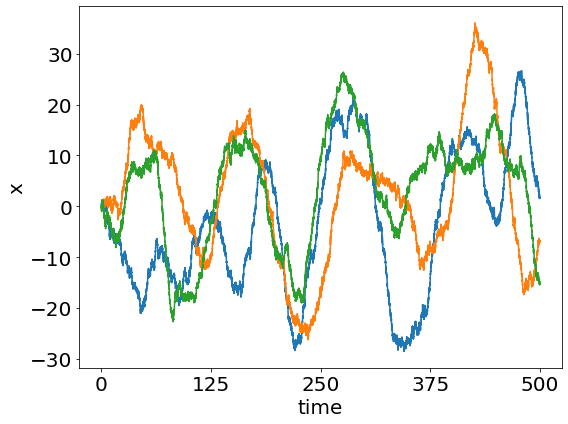

In [24]:
#Plot a sample trajectory
fig = plt.figure(figsize=(8,6))
plt.plot(time, x_traj_list[0])
plt.plot(time, x_traj_list[1])
plt.plot(time, x_traj_list[2])
# plt.plot(time, x_traj_list[3])
# plt.plot(time, x_traj_list[4])
plt.xlabel('time', fontsize=20)
plt.ylabel('x', fontsize=20)
plt.xticks(np.linspace(0, length_plot, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('sample_xtraj_paper_fin.png', dpi=100)
plt.show()

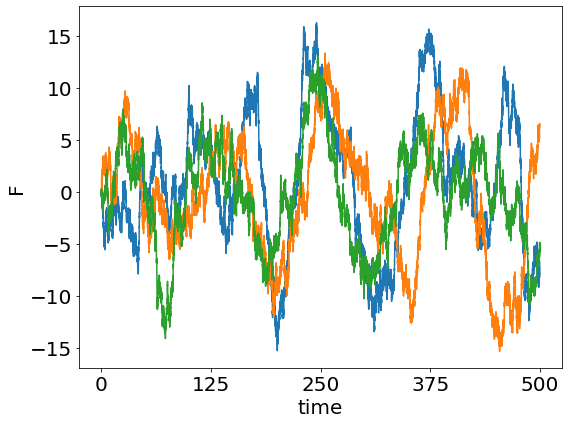

In [23]:
#Plot a sample trajectory
fig = plt.figure(figsize=(8,6))
plt.plot(time, y_traj_list[0])
plt.plot(time, y_traj_list[1])
plt.plot(time, y_traj_list[2])
# plt.plot(time, y_traj_list[3])
# plt.plot(time, y_traj_list[4])
plt.xlabel('time', fontsize=20)
plt.ylabel('F', fontsize=20)
plt.xticks(np.linspace(0, length_plot, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('sample_ytraj_paper_fin.png', dpi=100)
plt.show()

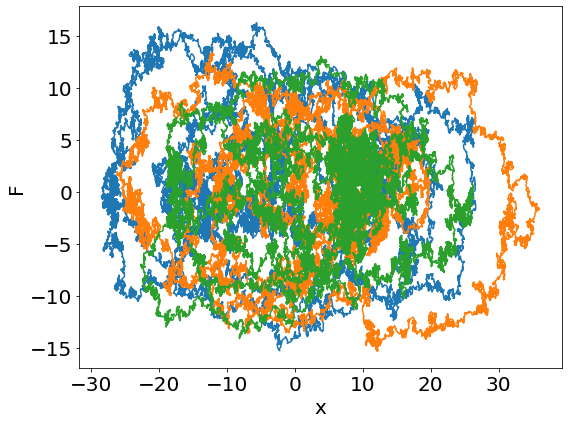

In [25]:
#Plot a sample trajectory
fig = plt.figure(figsize=(8,6))
plt.plot(x_traj_list[0], y_traj_list[0])
plt.plot(x_traj_list[1], y_traj_list[1])
plt.plot(x_traj_list[2], y_traj_list[2])
# plt.plot(x_traj_list[3], y_traj_list[3])
# plt.plot(x_traj_list[4], y_traj_list[4])

plt.xlabel('x', fontsize=20)
plt.ylabel('F', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('sample_xytraj_paper_fin.png', dpi=100)
plt.show()

In [ ]:
#Plot a sample trajectory
fig = plt.figure(figsize=(8,6))
plt.plot(time, y_traj_list[0])
plt.plot(time, y_traj_list[1])
plt.plot(time, y_traj_list[2])
plt.xlabel('time', fontsize=18)
plt.ylabel('x', fontsize=18)
plt.xticks(np.linspace(0, length_plot, 5), fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('sample_ytraj_paper_fin.png', dpi=100)
plt.show()

In [89]:
# def plotter_traj(x_traj_list, y_traj_list):

#     import matplotlib as mpl
#     label_size = 15
#     mpl.rcParams['xtick.labelsize'] = label_size 
#     mpl.rcParams['axes.labelsize'] = label_size 
#     mpl.rcParams['ytick.labelsize'] = label_size 

#     fig, ax = plt.subplots(1, 3, figsize=(15,3), dpi = 150)
#     plt.subplots_adjust(wspace = 15)

#     for x in x_traj_list[0:5]:
#         ax[0].plot(time, x)
#     for y in y_traj_list[0:5]:
#         ax[1].plot(time, y)
#     for x,y in zip(x_traj_list[0:5], y_traj_list[0:5]):
#         ax[2].plot(x,y)

#     ax[0].set_xlabel('time')
#     ax[0].set_ylabel('x')

#     ax[1].set_xlabel('time')
#     ax[1].set_ylabel('F')

#     ax[2].set_xlabel('x')
#     ax[2].set_ylabel('F')

#     fig.tight_layout()
#     fig.savefig('trajectories_paper.png')

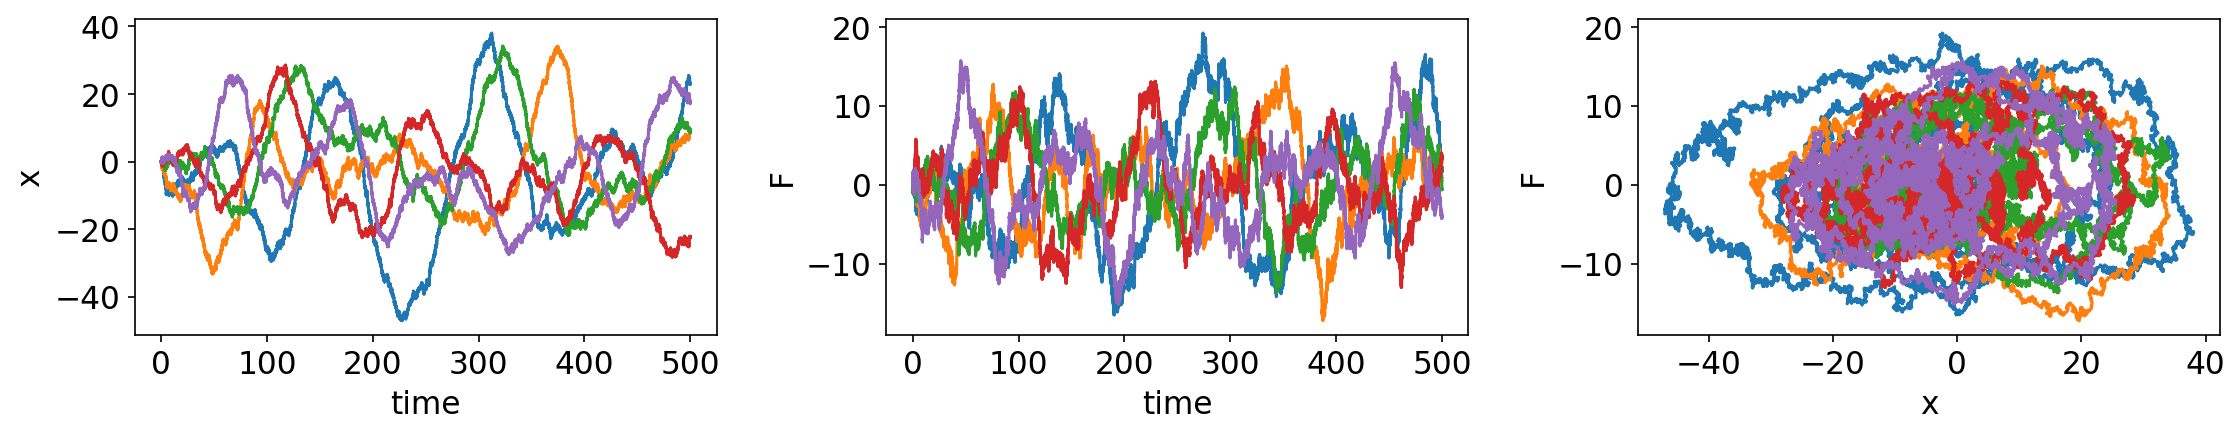

In [90]:
# plotter_traj(x_traj_list, y_traj_list)

In [ ]:
fig, ax = plt.subplot(3,1, figsize=(15,5))
ax[0].plot(time, x_traj_list[0])
ax[1].plot(time, y_traj_list[0])
ax[2].plot(x_traj_list, y_traj_list[0])

ax[0].set_xlabel('t ($ms$)', fontsize=18)
ax[0].set_ylabel('x', fontsize=18)

ax[1].set_xlabel('t ($ms$)', fontsize=18)
ax[1].set_ylabel('F', fontsize=18)



plt.
plt.ylabel('x ($nm$)', fontsize=18)
plt.xticks(np.linspace(0, length_plot, 5), fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('sample_traj_paper_fin.png', dpi=100)
plt.show()

In [ ]:
# #Plot a sample trajectory
# fig = plt.figure(figsize=(8,6))
# plt.plot(time, Y_traj_list[0])
# plt.plot(time, Y_traj_list[1])
# plt.plot(time, Y_traj_list[2])
# plt.xlabel('t ($ms$)', fontsize=18)
# plt.ylabel('F ($nm$)', fontsize=18)
# plt.xticks(np.linspace(0, length_plot, 5), fontsize=18)
# plt.yticks(fontsize=18)
# plt.tight_layout()
# plt.savefig('sample_traj_paper_fin.png', dpi=100)
# plt.show()

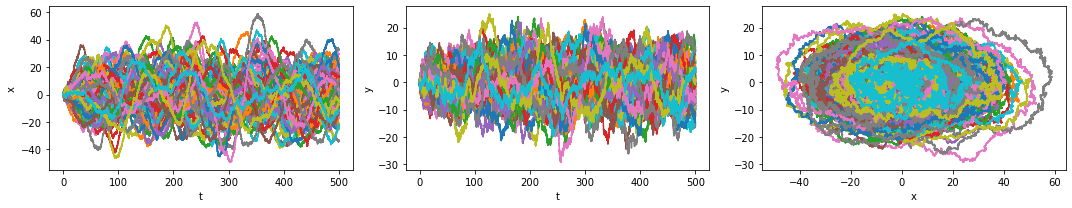

In [9]:
plotter_traj(x_traj_list, y_traj_list)

In [10]:
relax_time = int(abs(pars['gamma0']/pars['a00']))
traj_wout_relaxation_time = []
for traj in x_traj_list:
    final_traj = traj[relax_time::]
    traj_wout_relaxation_time.append(final_traj)

In [11]:
def autocorr(x):
    tau = np.arange(1, len(traj_wout_relaxation_time[0]), 50)
    
    corr_list = []
    for t in tau:
        xtau = np.roll(x, -t)
        
        product_list = []
        for x_value, xtau_value in zip(x, xtau):
            product = x_value*xtau_value
            product_list.append(product)
            
            
        corr = np.array(product_list[:-t]).mean()
        corr_list.append(corr)
    return corr_list

In [12]:
def ave_autocorr_traj(trajectory):
    autocorr_list = []
    for traj in tqdm(trajectory):
        autocorr_traj = autocorr(traj)
        autocorr_list.append(autocorr_traj)
        
    matrix = np.array((autocorr_list))
    mean_per_column = matrix.mean(axis=0)
    
    return mean_per_column

In [13]:
%%time
xtraj = ave_autocorr_traj(traj_wout_relaxation_time)

100%|██████████| 100/100 [31:21<00:00, 18.82s/it]

Wall time: 31min 21s


In [14]:
normalization = np.mean((np.array(traj_wout_relaxation_time))*(np.array(traj_wout_relaxation_time)))
final_c = xtraj/normalization

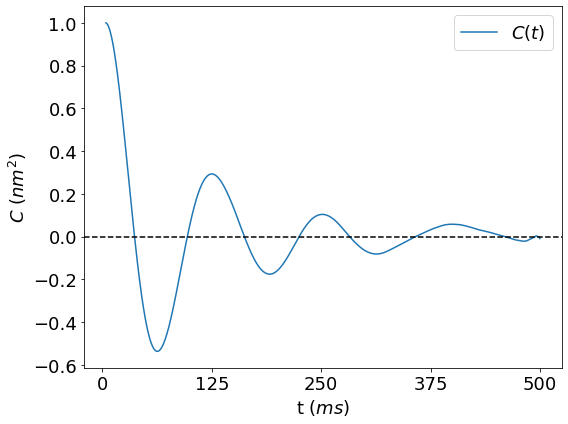

In [23]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.linspace(0,500,1000)[8:], final_c, label='$C(t)$')
plt.axhline(0, color='black', ls='dashed')
plt.xlabel('t ($ms$)', fontsize=18)
plt.ylabel('$C$ ($nm^2$)', fontsize=18)
plt.xticks(np.linspace(0, length_plot, 5), fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.legend(prop={'size': 18})
plt.savefig('autocorrelation_paper_fin.png', dpi=100)
plt.show()